Freedom in the World, Freedom House's flagship publication, is the standard-setting comparative assessment of global political rights and civil liberties. Published annually since 1972, the survey ratings and narrative reports on 195 countries and 15 related and disputed territories are used by policymakers, the media, international corporations, civic activists, and human rights defenders.



<img src="img.png" alt="Alternative text" />

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
import xgboost as xgb

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import tensorflow as tf

In [15]:
from tensorflow import keras

In [16]:
df=pd.read_csv("freedom.csv")


In [17]:
df

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1
...,...,...,...,...,...,...,...,...
4974,Zimbabwe,2016,5,5,PF,2,Africa,0
4975,Zimbabwe,2017,5,6,NF,2,Africa,0
4976,Zimbabwe,2018,5,5,PF,2,Africa,0
4977,Zimbabwe,2019,5,5,PF,2,Africa,0


In [18]:
df.isnull().sum()

country        0
year           0
CL             0
PR             0
Status         0
Region_Code    0
Region_Name    0
is_ldc         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      4979 non-null   object
 1   year         4979 non-null   int64 
 2   CL           4979 non-null   int64 
 3   PR           4979 non-null   int64 
 4   Status       4979 non-null   object
 5   Region_Code  4979 non-null   int64 
 6   Region_Name  4979 non-null   object
 7   is_ldc       4979 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 311.3+ KB


In [20]:
df.describe()

,year,CL,PR,Region_Code,is_ldc
count,4979.000000,4979.000000,4979.000000,4979.000000,4979.000000
mean,2007.555935,3.368548,3.410524,72.534244,0.236192
std,7.494463,1.868127,2.182737,68.642348,0.424784
min,1995.000000,1.000000,1.000000,2.000000,0.000000
25%,2001.000000,2.000000,1.000000,2.000000,0.000000
50%,2008.000000,3.000000,3.000000,19.000000,0.000000
75%,2014.000000,5.000000,6.000000,142.000000,0.000000
max,2020.000000,7.000000,7.000000,150.000000,1.000000


In [21]:
df.columns

Index(['country', 'year', 'CL', 'PR', 'Status', 'Region_Code', 'Region_Name',
       'is_ldc'],
      dtype='object')

In [22]:
df.shape

(4979, 8)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

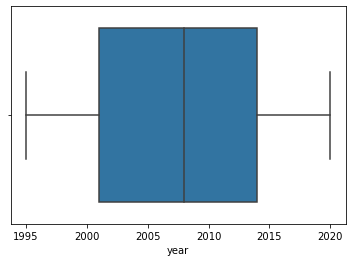

In [23]:
sns.boxplot(df['year'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CL'>

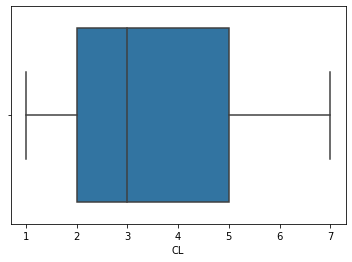

In [24]:
sns.boxplot(df['CL'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PR'>

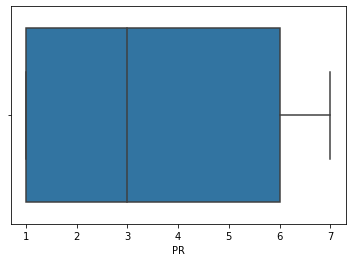

In [25]:
sns.boxplot(df['PR'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region_Code'>

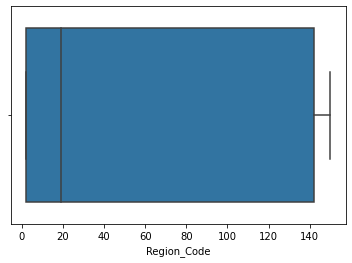

In [26]:
sns.boxplot(df['Region_Code'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_ldc'>

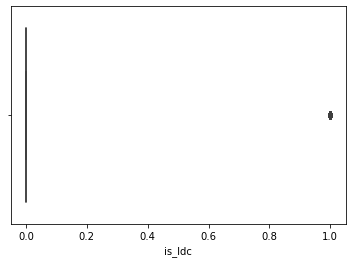

In [27]:
sns.boxplot(df['is_ldc'])

In [28]:
df

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1
...,...,...,...,...,...,...,...,...
4974,Zimbabwe,2016,5,5,PF,2,Africa,0
4975,Zimbabwe,2017,5,6,NF,2,Africa,0
4976,Zimbabwe,2018,5,5,PF,2,Africa,0
4977,Zimbabwe,2019,5,5,PF,2,Africa,0


In [29]:
df.duplicated().sum()

0

In [30]:
df

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1
...,...,...,...,...,...,...,...,...
4974,Zimbabwe,2016,5,5,PF,2,Africa,0
4975,Zimbabwe,2017,5,6,NF,2,Africa,0
4976,Zimbabwe,2018,5,5,PF,2,Africa,0
4977,Zimbabwe,2019,5,5,PF,2,Africa,0


<AxesSubplot:xlabel='Region_Name', ylabel='count'>

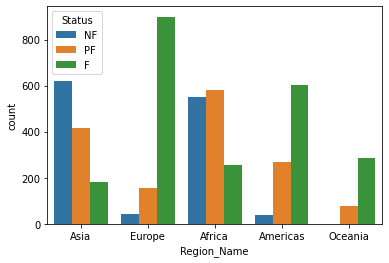

In [31]:
sns.countplot(x=df['Region_Name'],hue=df['Status'])

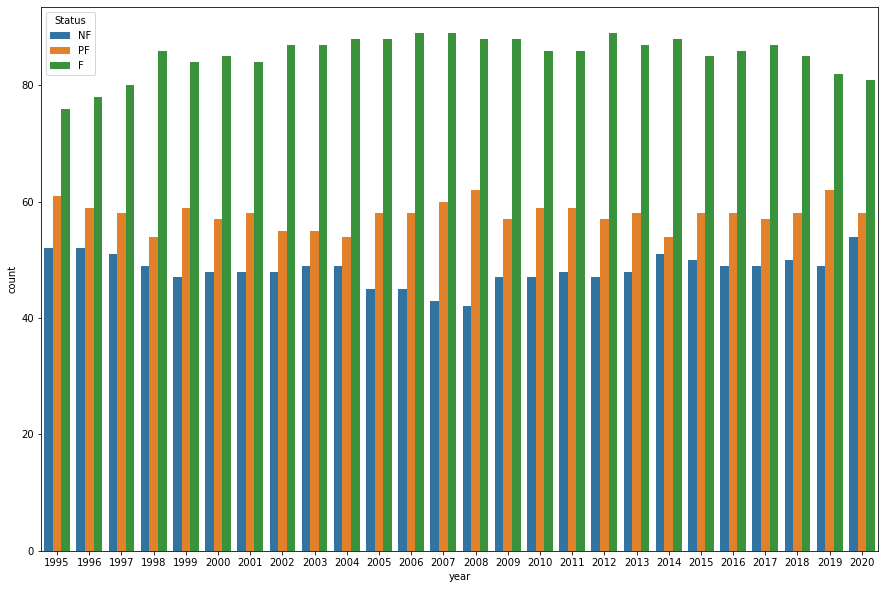

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['year'],hue=df['Status'])
plt.show()

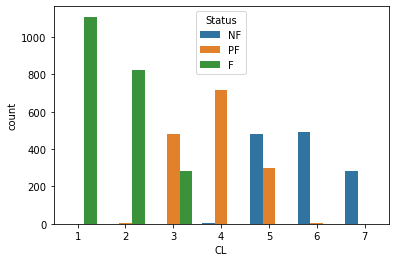

In [33]:
sns.countplot(x=df['CL'],hue=df['Status'])
plt.show()

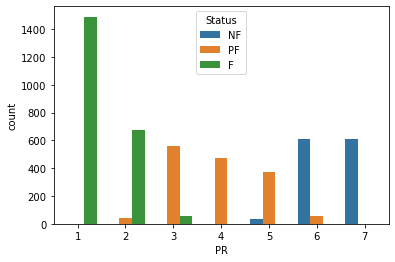

In [34]:
sns.countplot(x=df['PR'],hue=df['Status'])
plt.show()

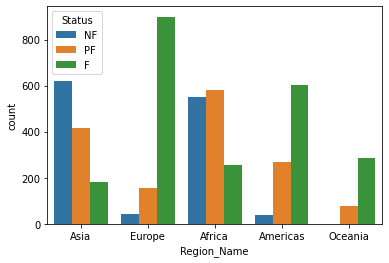

In [35]:
sns.countplot(x=df['Region_Name'],hue=df['Status'])
plt.show()

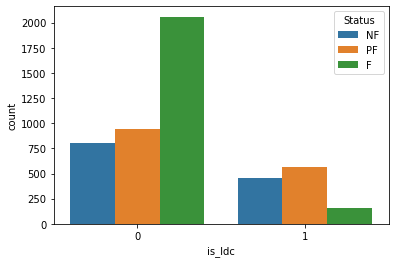

In [36]:
sns.countplot(x=df['is_ldc'],hue=df['Status'])
plt.show()

In [37]:
df

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1
...,...,...,...,...,...,...,...,...
4974,Zimbabwe,2016,5,5,PF,2,Africa,0
4975,Zimbabwe,2017,5,6,NF,2,Africa,0
4976,Zimbabwe,2018,5,5,PF,2,Africa,0
4977,Zimbabwe,2019,5,5,PF,2,Africa,0


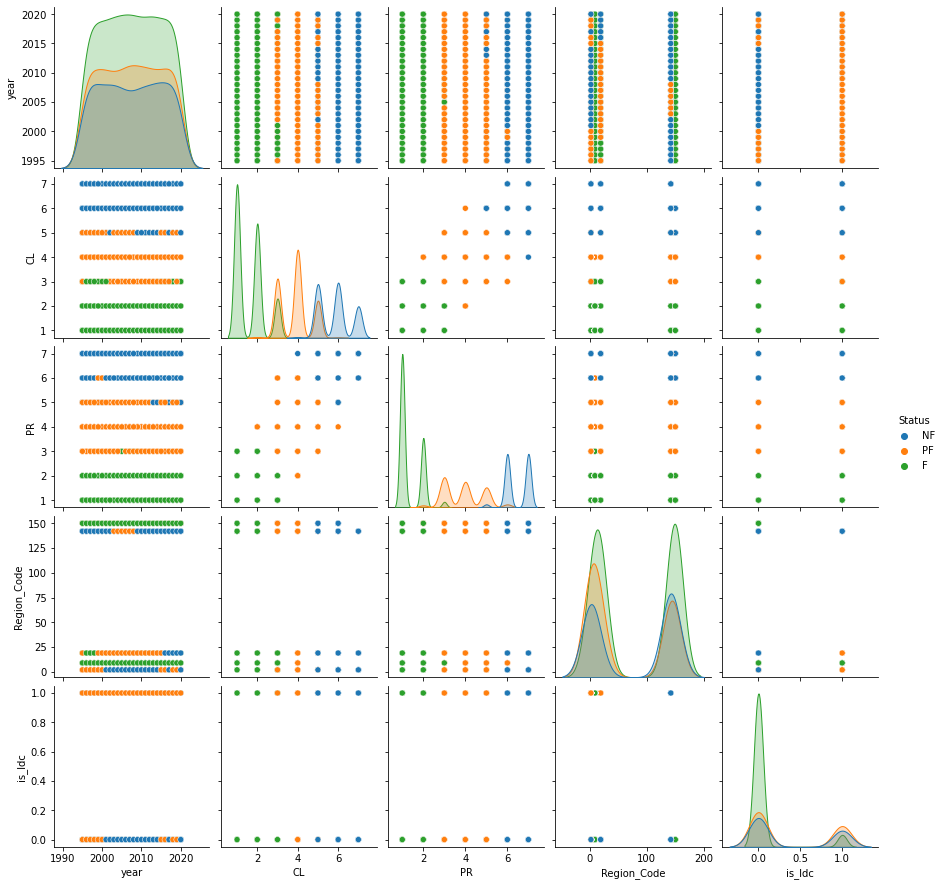

In [38]:
sns.pairplot(data=df,hue='Status')

<AxesSubplot:>

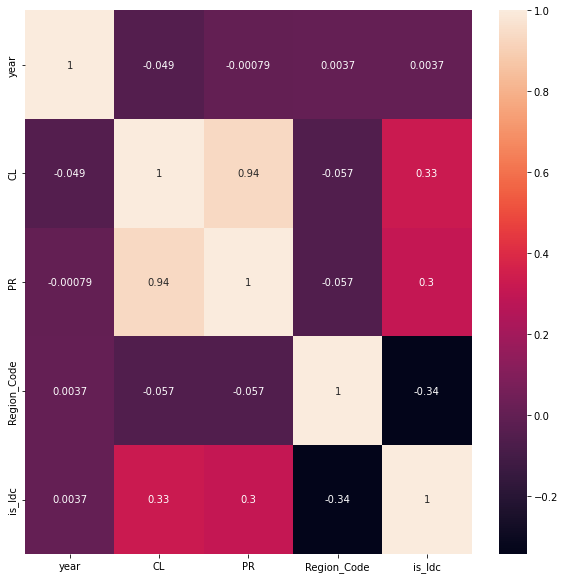

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


In [40]:
df

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,Afghanistan,1995,7,7,NF,142,Asia,1
1,Afghanistan,1996,7,7,NF,142,Asia,1
2,Afghanistan,1997,7,7,NF,142,Asia,1
3,Afghanistan,1998,7,7,NF,142,Asia,1
4,Afghanistan,1999,7,7,NF,142,Asia,1
...,...,...,...,...,...,...,...,...
4974,Zimbabwe,2016,5,5,PF,2,Africa,0
4975,Zimbabwe,2017,5,6,NF,2,Africa,0
4976,Zimbabwe,2018,5,5,PF,2,Africa,0
4977,Zimbabwe,2019,5,5,PF,2,Africa,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CL', ylabel='Density'>

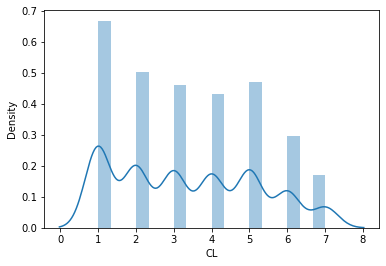

In [41]:
sns.distplot(df['CL'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PR', ylabel='Density'>

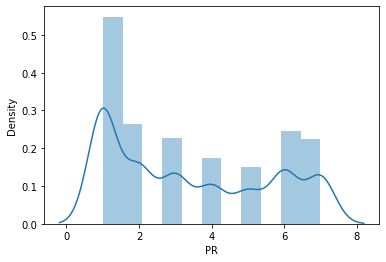

In [42]:
sns.distplot(df['PR'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Region_Code', ylabel='Density'>

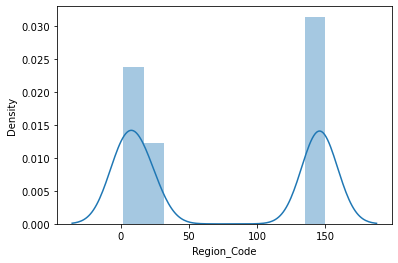

In [43]:
sns.distplot(df['Region_Code'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='is_ldc', ylabel='Density'>

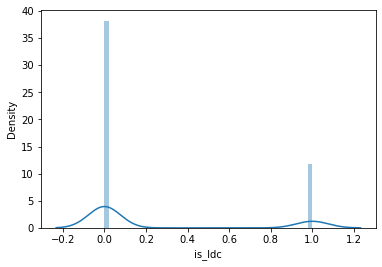

In [44]:
sns.distplot(df['is_ldc'])

In [45]:
le=LabelEncoder()


In [46]:
df['country']=le.fit_transform(df['country'])

In [47]:
df['Status']=le.fit_transform(df['Status'])

In [48]:
df['Region_Name']=le.fit_transform(df['Region_Name'])

In [49]:
df

,country,year,CL,PR,Status,Region_Code,Region_Name,is_ldc
0,0,1995,7,7,1,142,2,1
1,0,1996,7,7,1,142,2,1
2,0,1997,7,7,1,142,2,1
3,0,1998,7,7,1,142,2,1
4,0,1999,7,7,1,142,2,1
...,...,...,...,...,...,...,...,...
4974,192,2016,5,5,2,2,0,0
4975,192,2017,5,6,1,2,0,0
4976,192,2018,5,5,2,2,0,0
4977,192,2019,5,5,2,2,0,0


In [50]:
df=df.drop('CL',axis=1)


In [51]:
df

,country,year,PR,Status,Region_Code,Region_Name,is_ldc
0,0,1995,7,1,142,2,1
1,0,1996,7,1,142,2,1
2,0,1997,7,1,142,2,1
3,0,1998,7,1,142,2,1
4,0,1999,7,1,142,2,1
...,...,...,...,...,...,...,...
4974,192,2016,5,2,2,0,0
4975,192,2017,6,1,2,0,0
4976,192,2018,5,2,2,0,0
4977,192,2019,5,2,2,0,0


In [52]:
df['Status'].value_counts()/len(df)

0    0.445672
2    0.301868
1    0.252460
Name: Status, dtype: float64

In [53]:
X=df.drop('Status',axis=1)

In [54]:
y=df['Status']

In [55]:
sc=StandardScaler()


In [56]:
X=sc.fit_transform(X)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [58]:
X_train.shape

(3983, 6)

In [59]:
X_test.shape

(996, 6)

In [60]:
4979*0.80

3983.2000000000003

# RandomForestClassifier

In [61]:
rfc=RandomForestClassifier()


In [62]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [63]:
y_pred=rfc.predict(X_train)


In [64]:
accuracy_score(y_train,y_pred)

1.0

In [65]:
y_pred=rfc.predict(X_test)


In [66]:
accuracy_score(y_test,y_pred)

0.9839357429718876

In [67]:
KF=KFold(5)

In [68]:
scores=cross_val_score(rfc,X_test,y_test,cv=KF)

In [69]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.955
1 0.9798994974874372
2 0.9597989949748744
3 0.9547738693467337
4 0.9698492462311558


In [70]:
scores.mean()

0.9638643216080401

In [71]:
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

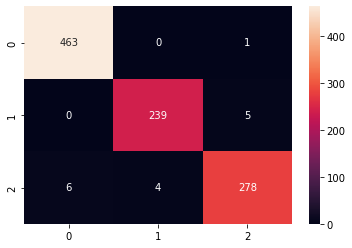

In [72]:
sns.heatmap(data=cm,annot=True,fmt='d')

# LogisticRegression

In [73]:
lr=LogisticRegression()

In [74]:
lr.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_pred=lr.predict(X_train)


In [76]:
accuracy_score(y_train,y_pred)

0.9640974140095405

In [77]:
y_pred=lr.predict(X_test)


In [78]:
accuracy_score(y_test,y_pred)

0.964859437751004

In [79]:
KF=KFold(5)

In [80]:
scores=cross_val_score(lr,X_test,y_test,cv=KF)

In [81]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.955
1 0.9849246231155779
2 0.9447236180904522
3 0.9547738693467337
4 0.9748743718592965


In [82]:
scores.mean()

0.9628592964824121

In [83]:
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

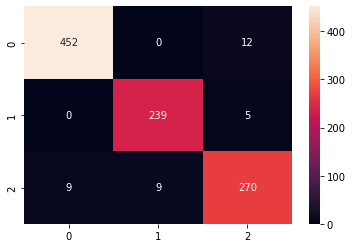

In [84]:
sns.heatmap(data=cm,annot=True,fmt='d')

# XGBClassifier

In [85]:
xgb_i=xgb.XGBClassifier()

In [86]:
xgb_i.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [87]:
y_pred=xgb_i.predict(X_train)


In [88]:
accuracy_score(y_train,y_pred)

1.0

In [89]:
y_pred=xgb_i.predict(X_test)


In [90]:
accuracy_score(y_test,y_pred)

0.9859437751004017

In [91]:
KF=KFold(5)

In [92]:
scores=cross_val_score(xgb_i,X_test,y_test,cv=KF)

In [93]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.96
1 0.9748743718592965
2 0.9698492462311558
3 0.9547738693467337
4 0.9698492462311558


In [94]:
scores.mean()

0.9658693467336683

In [95]:
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

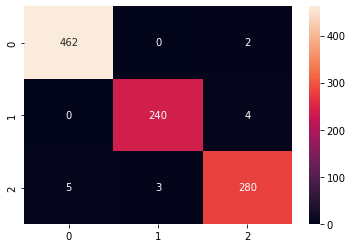

In [96]:
sns.heatmap(data=cm,annot=True,fmt='d')

# DecisionTreeClassifier

In [97]:
dtc=DecisionTreeClassifier()

In [98]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [99]:
y_pred=dtc.predict(X_train)


In [100]:
accuracy_score(y_train,y_pred)

1.0

In [101]:
y_pred=dtc.predict(X_test)


In [102]:
accuracy_score(y_test,y_pred)

0.9769076305220884

In [103]:
KF=KFold(5)

In [104]:
scores=cross_val_score(dtc,X_test,y_test,cv=KF)

In [105]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.945
1 0.949748743718593
2 0.9346733668341709
3 0.9195979899497487
4 0.9698492462311558


In [106]:
scores.mean()

0.9437738693467337

In [107]:
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

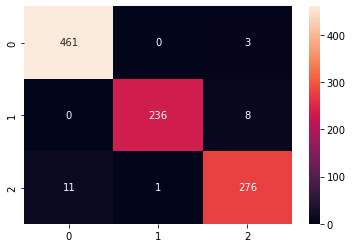

In [108]:
sns.heatmap(data=cm,annot=True,fmt='d')

# KNeighborsClassifier

In [109]:
knc=KNeighborsClassifier()

In [110]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred=knc.predict(X_train)


In [112]:
accuracy_score(y_train,y_pred)

0.9781571679638463

In [113]:
y_pred=knc.predict(X_test)


In [114]:
accuracy_score(y_test,y_pred)

0.9628514056224899

In [115]:
KF=KFold(5)

In [116]:
scores=cross_val_score(knc,X_test,y_test,cv=KF)

In [117]:
for idx,val in enumerate(scores):
    print(idx,val)

0 0.9
1 0.8844221105527639
2 0.8592964824120602
3 0.9045226130653267
4 0.9296482412060302


In [118]:
scores.mean()

0.8955778894472362

In [119]:
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

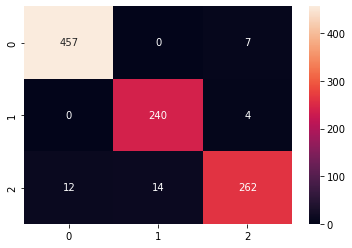

In [120]:
sns.heatmap(data=cm,annot=True,fmt='d')

# ANN

In [121]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(6,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')   
])

In [122]:
model.compile(optimizer='adam',
    loss=['categorical_crossentropy'],
    metrics=['accuracy'])

In [123]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6141
Epoch 2/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6432
Epoch 3/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6608
Epoch 4/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6703
Epoch 5/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6724
Epoch 6/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6714
Epoch 7/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6724
Epoch 8/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6729
Epoch 9/10
125/125 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.6734
Epoch 10/10
125/125 [==============================] - 0s 2ms/st

In [124]:
model.evaluate(X_test,y_test)

32/32 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.6867


[0.0, 0.6867470145225525]

In [125]:
y_pred=model.predict(X_test)


32/32 [==============================] - 0s 984us/step


In [126]:
y_pred

array([[1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [2.62470529e-17],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],


In [127]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)


<AxesSubplot:>

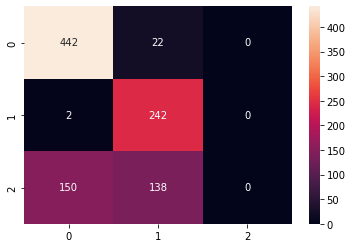

In [128]:
sns.heatmap(data=cm,annot=True,fmt='d')